In [1]:
#loading necessary packages
library(repr)
library(tidyverse)
library(broom)
library(faraway)
library(leaps)
library(cowplot)
options(repr.matrix.max.rows = 12)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




In [2]:
#reading dataset
student_raw <- read_delim(file = "Student_performance_data _.csv", delim = ",")
student_raw

Rows: 2392 Columns: 15
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWee...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.9291956,2
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.0429148,1
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.1126023,4
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.0542181,3
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.2880612,4
1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.0841836,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3387,16,0,0,2,13.814021,14,0,2,0,0,0,0,2.000084,4
3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0


In [3]:
#removing observations with missing data then selecting only the variables of interest
student <- student_raw |>
    filter(if_all(everything(), ~!is.na(.x))) |>
    distinct() |>
    select(c(GPA, StudyTimeWeekly, Absences, ParentalEducation, ParentalSupport))

student

GPA,StudyTimeWeekly,Absences,ParentalEducation,ParentalSupport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.9291956,19.833723,7,2,2
3.0429148,15.408756,0,1,1
0.1126023,4.210570,26,3,2
2.0542181,10.028829,14,3,3
1.2880612,4.672495,17,2,3
3.0841836,8.191219,0,1,1
⋮,⋮,⋮,⋮,⋮
2.000084,13.814021,14,2,2
3.455509,10.680555,2,3,4


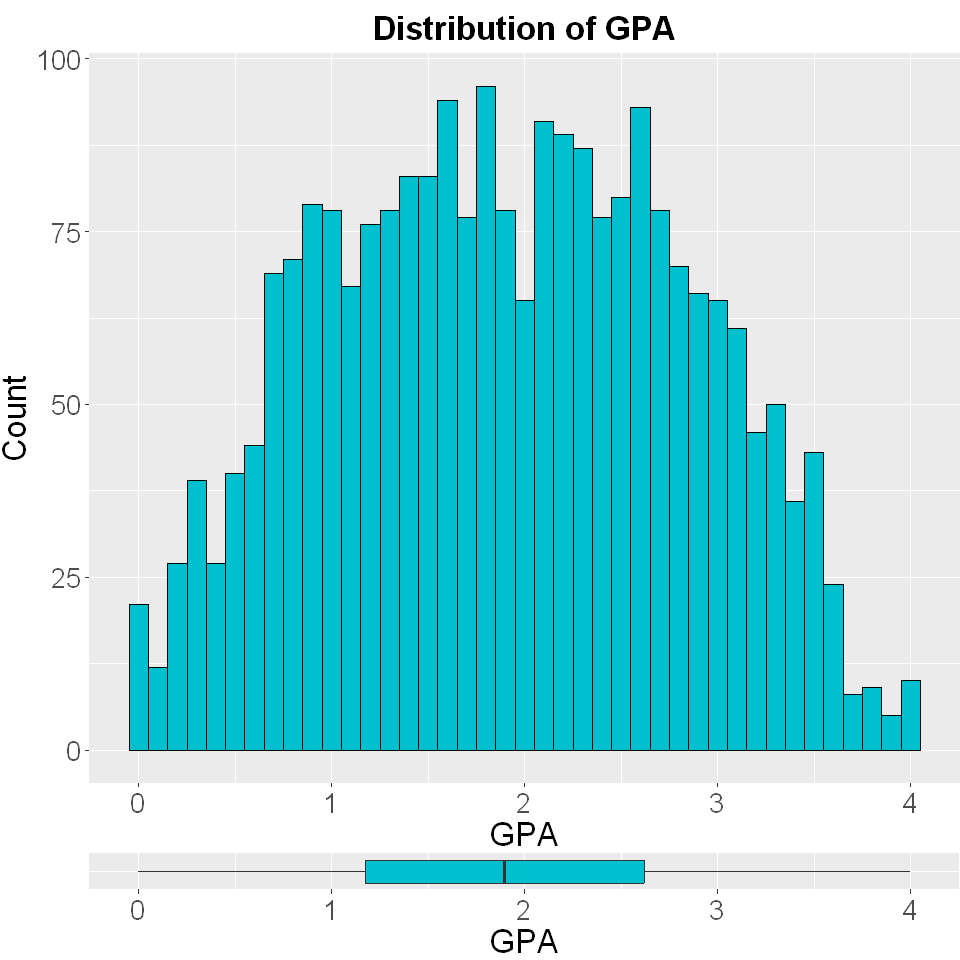

In [4]:
#visualizing distribution of GPA
title <- ggdraw() + draw_label("Distribution of GPA", fontface = "bold", size = 20)

options(repr.plot.width = 12, repr.plot.height = 4)
gpa_box <- student |>
    ggplot(aes(x = GPA, y = "")) + 
    geom_boxplot(fill = "#00BFCF") + 
    labs(x = "GPA", y = "") + 
    xlim(-0.05, 4.05) +
    theme(axis.ticks.y = element_blank(), axis.text.y = element_blank()) +
    theme(plot.margin = unit(c(0,0,0,0), "cm")) +
    theme(text = element_text(size = 20))

options(repr.plot.width = 8, repr.plot.height = 8)
gpa_hist <- student |>  
    ggplot(aes(x = GPA)) + 
    geom_histogram(binwidth = 0.1, fill = "#00BFCF", col = "black") +
    labs(x = "GPA", y = "Count") + 
    theme(plot.margin = unit(c(0,0,0,0), "cm")) + 
    theme(text = element_text(size = 20))

plot_grid(title, gpa_hist, gpa_box, ncol = 1, align = "v", rel_heights = c(0.5,7.5, 1), axis = "lr")

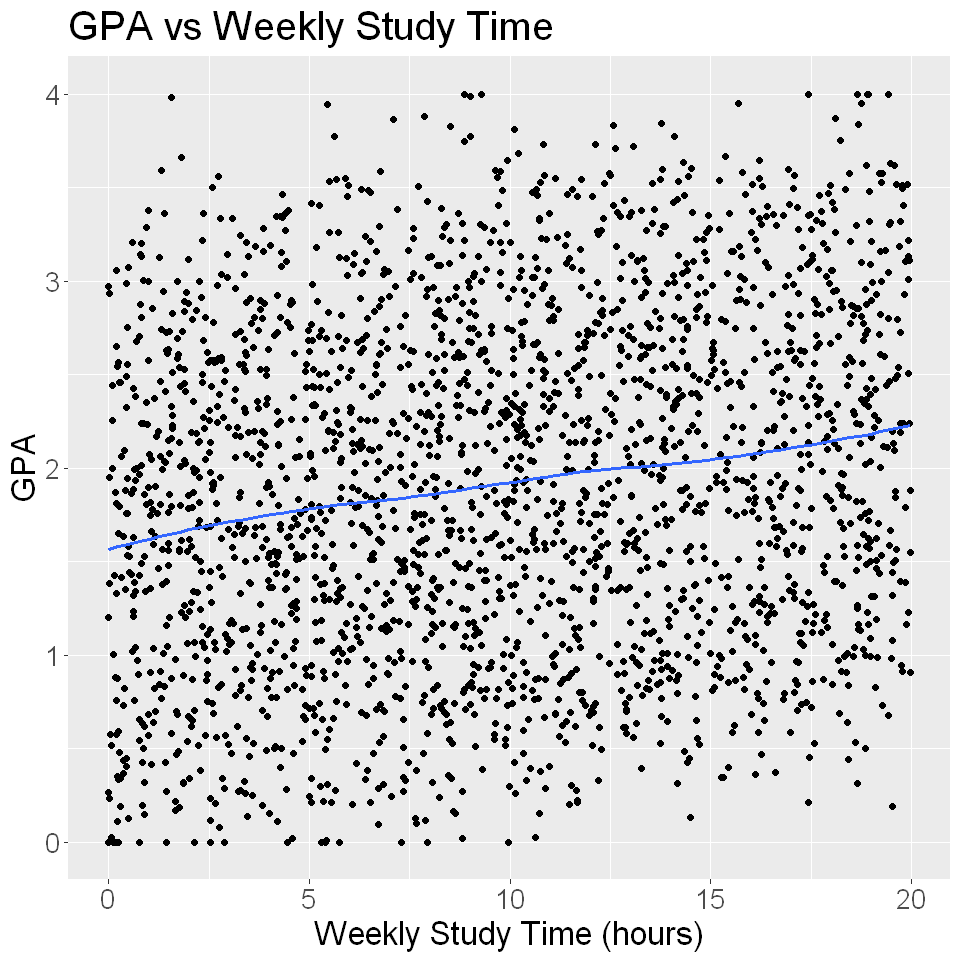

In [5]:
#plotting GPA against weekly study time
options(repr.plot.width = 8, repr.plot.height = 8)
study_time_plot <- ggplot(student, aes(x = StudyTimeWeekly, y = GPA)) +
    geom_point() +
    geom_smooth(method = 'loess', formula = y ~ x, se = FALSE) + 
    labs(x = "Weekly Study Time (hours)", y = "GPA", title = "GPA vs Weekly Study Time") + 
    theme(text = element_text(size = 20))
study_time_plot

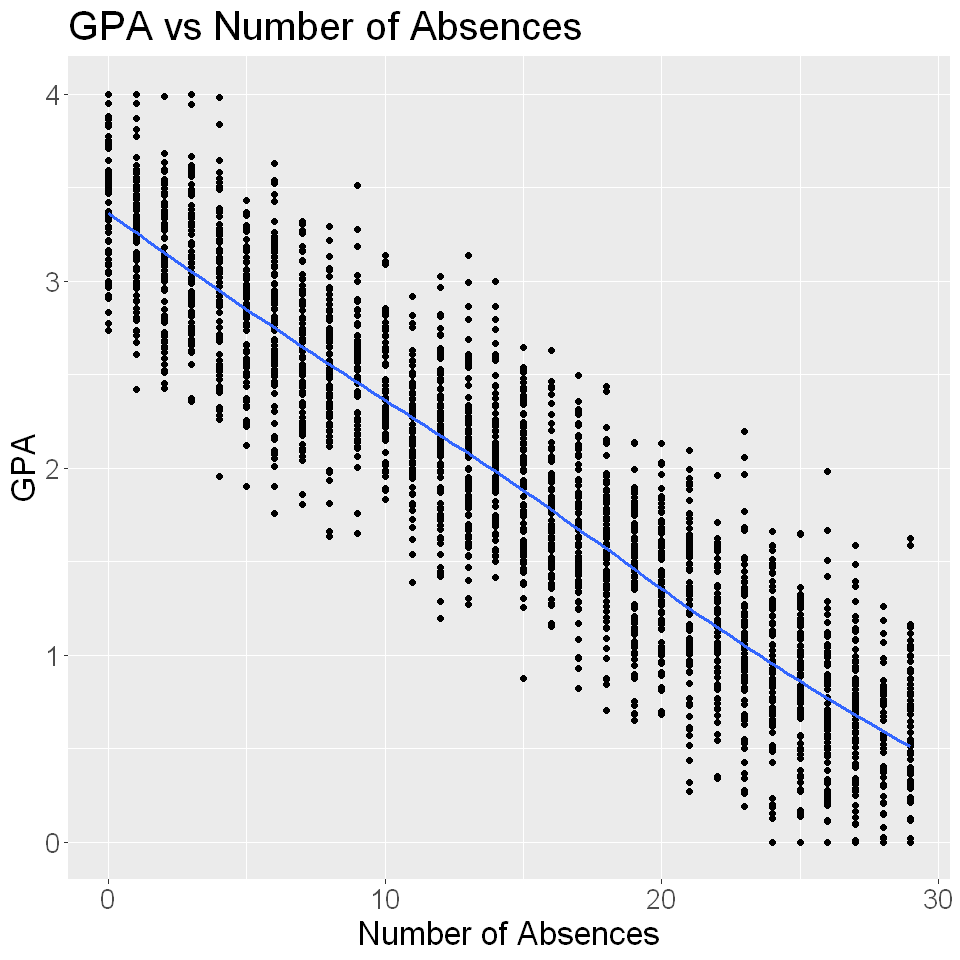

In [6]:
#plotting GPA against number of absences
options(repr.plot.width = 8, repr.plot.height = 8)
absence_plot <- ggplot(student, aes(x = Absences, y = GPA)) +
    geom_point() +
    geom_smooth(method = 'loess', formula = y ~ x, se = FALSE) + 
    labs(x = "Number of Absences", y = "GPA", title = "GPA vs Number of Absences") + 
    theme(text = element_text(size = 20))
absence_plot

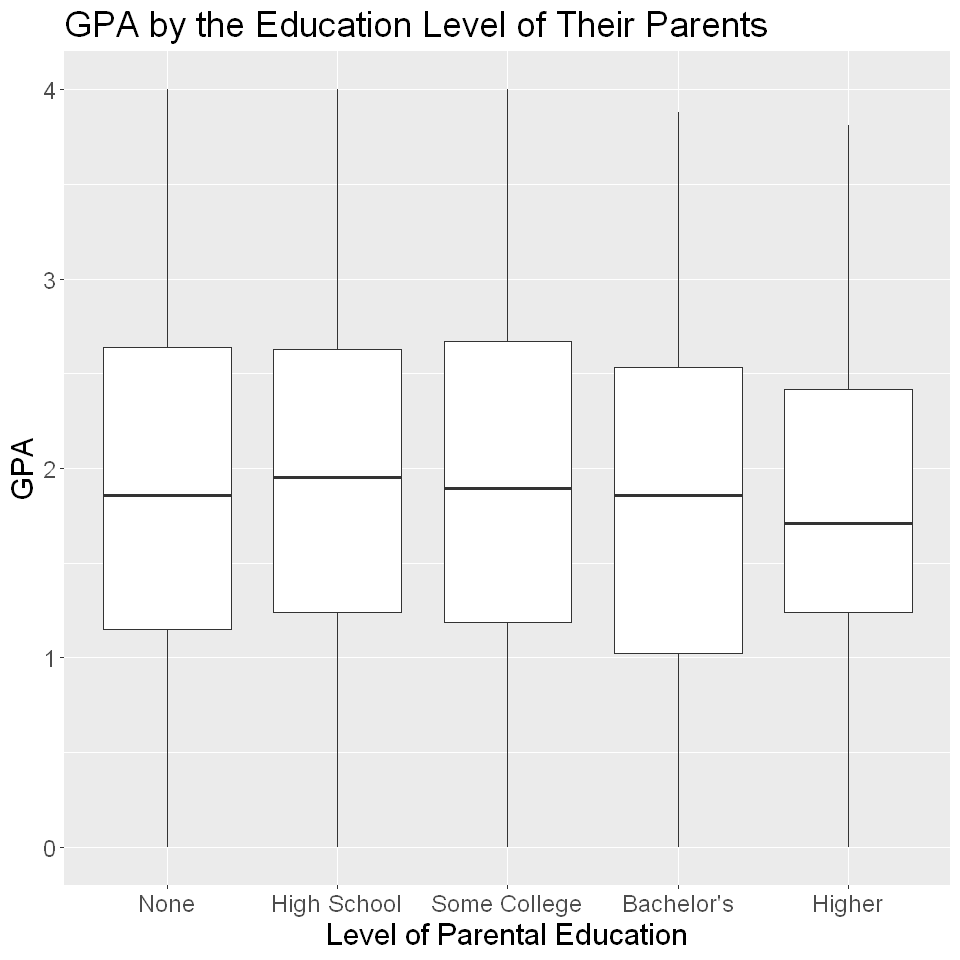

In [7]:
#visualizing the distribution of GPA by level of parental education
options(repr.plot.width = 8, repr.plot.height = 8)
edu_plot <- ggplot(student, aes(as.factor(ParentalEducation), GPA)) +
    geom_boxplot() +
    theme(text = element_text(size = 18)) +
    labs(x = "Level of Parental Education", y = "GPA", title = "GPA by the Education Level of Their Parents") + 
    scale_x_discrete(labels = c("None", "High School", "Some College", "Bachelor's", "Higher"))
edu_plot

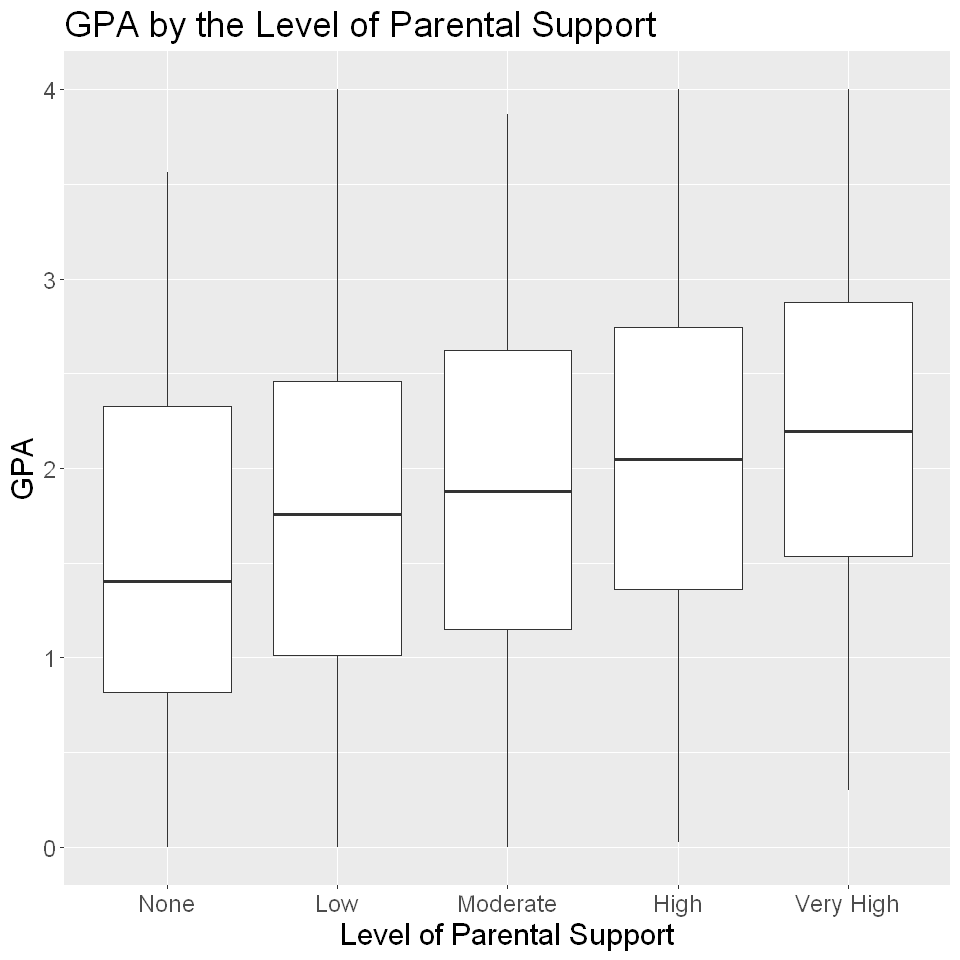

In [8]:
#visualizing the distribution of GPA by level of parental support
options(repr.plot.width = 8, repr.plot.height = 8)
supp_plot <- ggplot(student, aes(x = as.factor(ParentalSupport), y = GPA)) +
    geom_boxplot() +
    theme(text = element_text(size = 18)) +
    labs(x = "Level of Parental Support", y = "GPA", title = "GPA by the Level of Parental Support") + 
    scale_x_discrete(labels = c("None", "Low", "Moderate", "High", "Very High"))
supp_plot

In [9]:
#computing correlation matrix
cor(student)

,GPA,StudyTimeWeekly,Absences,ParentalEducation,ParentalSupport
GPA,1.00000000,0.179275127,-0.919313576,-0.03585364,0.190773728
StudyTimeWeekly,0.17927513,1.000000000,0.009325535,-0.01105118,0.035799964
Absences,-0.91931358,0.009325535,1.000000000,0.03651750,0.002107808
ParentalEducation,-0.03585364,-0.011051182,0.036517503,1.00000000,-0.017463038
ParentalSupport,0.19077373,0.035799964,0.002107808,-0.01746304,1.000000000


In [10]:
#fitting the full model
fullModel = lm(GPA ~ StudyTimeWeekly + Absences + ParentalSupport + ParentalEducation, data = student)
summary(fullModel) 


Call:
lm(formula = GPA ~ StudyTimeWeekly + Absences + ParentalSupport + 
    ParentalEducation, data = student)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99300 -0.19535 -0.00691  0.18392  1.00149 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        2.7406648  0.0198537  138.043   <2e-16 ***
StudyTimeWeekly    0.0293408  0.0009664   30.361   <2e-16 ***
Absences          -0.0995963  0.0006451 -154.380   <2e-16 ***
ParentalSupport    0.1518297  0.0048655   31.205   <2e-16 ***
ParentalEducation  0.0027932  0.0054613    0.511    0.609    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2669 on 2387 degrees of freedom
Multiple R-squared:  0.9151,	Adjusted R-squared:  0.9149 
F-statistic:  6430 on 4 and 2387 DF,  p-value: < 2.2e-16


In [11]:
#fitting a model with ParentalEducation removed
fourModel = lm(GPA ~ StudyTimeWeekly + Absences + ParentalSupport, data = student)
summary(fourModel) 


Call:
lm(formula = GPA ~ StudyTimeWeekly + Absences + ParentalSupport, 
    data = student)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98959 -0.19507 -0.00549  0.18339  1.00223 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.7455092  0.0174460  157.37   <2e-16 ***
StudyTimeWeekly  0.0293355  0.0009662   30.36   <2e-16 ***
Absences        -0.0995842  0.0006446 -154.49   <2e-16 ***
ParentalSupport  0.1517870  0.0048640   31.21   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2669 on 2388 degrees of freedom
Multiple R-squared:  0.9151,	Adjusted R-squared:  0.915 
F-statistic:  8576 on 3 and 2388 DF,  p-value: < 2.2e-16


In [12]:
#computing the 'best' model for each number of parameters
subs <- regsubsets(GPA ~ StudyTimeWeekly + Absences + ParentalSupport + ParentalEducation, data = student)
summary(subs) 
summary(subs)$which

Subset selection object
Call: regsubsets.formula(GPA ~ StudyTimeWeekly + Absences + ParentalSupport + 
    ParentalEducation, data = student)
4 Variables  (and intercept)
                  Forced in Forced out
StudyTimeWeekly       FALSE      FALSE
Absences              FALSE      FALSE
ParentalSupport       FALSE      FALSE
ParentalEducation     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         StudyTimeWeekly Absences ParentalSupport ParentalEducation
1  ( 1 ) " "             "*"      " "             " "              
2  ( 1 ) " "             "*"      "*"             " "              
3  ( 1 ) "*"             "*"      "*"             " "              
4  ( 1 ) "*"             "*"      "*"             "*"              

,(Intercept),StudyTimeWeekly,Absences,ParentalSupport,ParentalEducation
1,TRUE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,TRUE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE
4,TRUE,TRUE,TRUE,TRUE,TRUE


Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_point()`)."


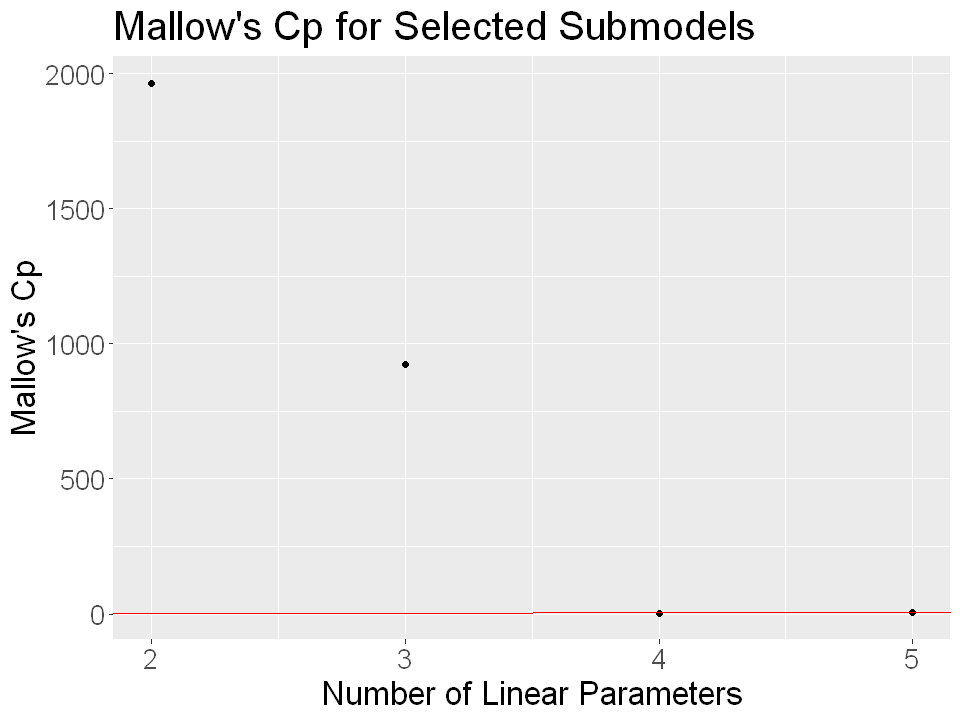

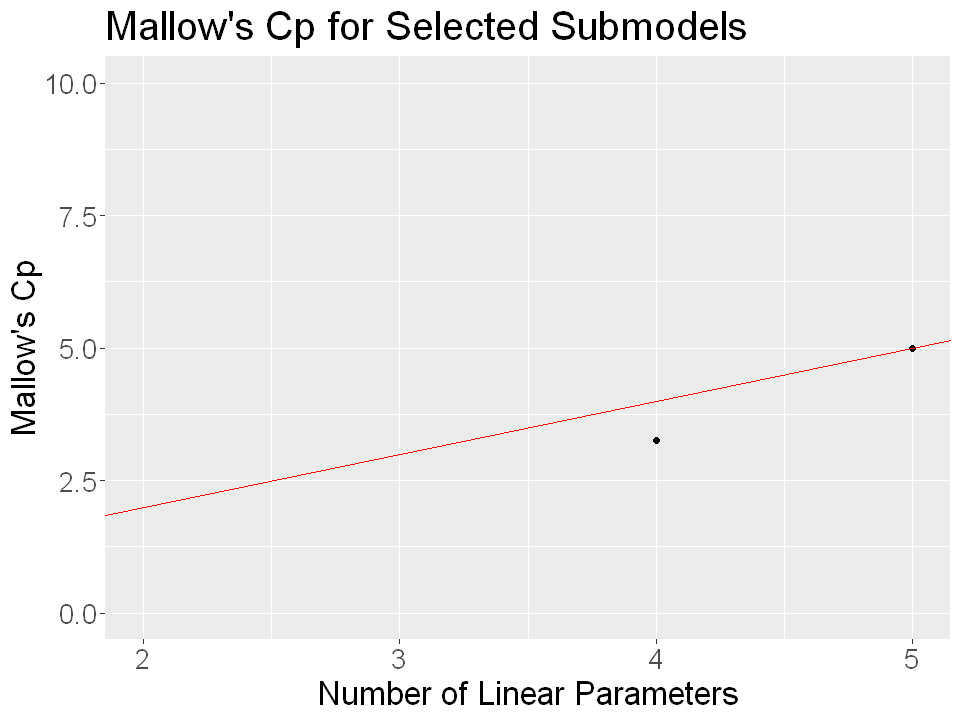

In [13]:
#visualizing Mallow's Cp for selected submodels
num_params <- c(2,3,4,5)
options(repr.plot.width = 8, repr.plot.height = 6)
cp <- tibble(p = num_params, cp = summary(subs)$cp)
mallow <- cp |> 
    ggplot(aes(x = p, y = cp)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    theme(text = element_text(size = 20)) +
    labs(x = "Number of Linear Parameters", y = "Mallow's Cp", title = "Mallow's Cp for Selected Submodels")
mallow

options(repr.plot.width = 8, repr.plot.height = 6)
mallow + ylim(0, 10)

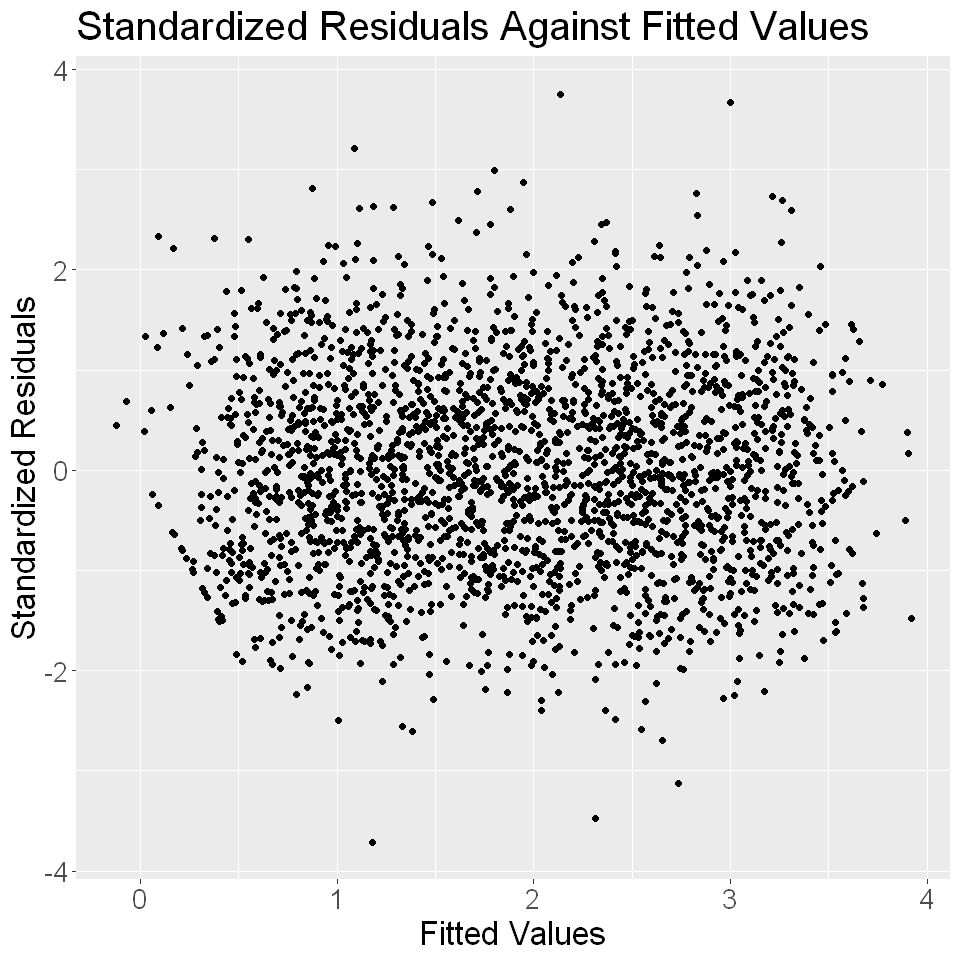

In [14]:
#plotting standardized residuals against the fitted values
options(repr.plot.width = 8, repr.plot.height = 8)
sres <- tibble(fits = fourModel$fitted.value, sres = rstandard(fourModel))
standardres <- sres |> 
    ggplot(aes(x = fits, y = sres)) +
    geom_point() +
    theme(text = element_text(size = 20)) +
    labs(x = "Fitted Values", y = "Standardized Residuals", title = "Standardized Residuals Against Fitted Values")
standardres

In [15]:
#returning a list of fitted values <0 or >4
fourModel$fitted.values[fourModel$fitted.values < 0 | fourModel$fitted.values > 4]

485         986 
-0.11992496 -0.06812184